<a href="https://colab.research.google.com/github/s9b/NBA-Draft-Combine-Measurements-Analysis/blob/main/NBA_Draft_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the data
file_path = 'nba_draft_data.csv'  # Replace with your file name if different
nba_draft_data = pd.read_csv('/content/nba_draft_data.csv')

# Display basic information about the dataset
print(nba_draft_data.info())
print(nba_draft_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SEASON                        1551 non-null   int64  
 1   PLAYER_ID                     1551 non-null   int64  
 2   FIRST_NAME                    1551 non-null   object 
 3   LAST_NAME                     1551 non-null   object 
 4   PLAYER_NAME                   1551 non-null   object 
 5   POSITION                      1546 non-null   object 
 6   HEIGHT_WO_SHOES               1505 non-null   float64
 7   HEIGHT_WO_SHOES_FT_IN         1505 non-null   object 
 8   HEIGHT_W_SHOES                1284 non-null   float64
 9   HEIGHT_W_SHOES_FT_IN          1284 non-null   object 
 10  WEIGHT                        1503 non-null   float64
 11  WINGSPAN                      1506 non-null   float64
 12  WINGSPAN_FT_IN                1506 non-null   object 
 13  STA

In [ ]:
# Drop irrelevant or highly missing columns
nba_draft_data_cleaned = nba_draft_data.drop(columns=[
    'PLAYER_ID', 'FIRST_NAME', 'LAST_NAME', 'PLAYER_NAME',
    'SPOT_NBA_BREAK_RIGHT', 'SPOT_NBA_CORNER_RIGHT',  # Columns with many NaNs
    'OFF_DRIB_FIFTEEN_BREAK_LEFT', 'OFF_DRIB_COLLEGE_BREAK_RIGHT',  # Add more if needed
])

# Convert relevant columns to numeric type, handling errors
for col in nba_draft_data_cleaned.columns:
    if nba_draft_data_cleaned[col].dtype == 'object':  # Check if column is of object type
        try:
            nba_draft_data_cleaned[col] = pd.to_numeric(nba_draft_data_cleaned[col], errors='coerce')
        except ValueError:
            print(f"Could not convert column {col} to numeric.")

# Handle missing values by filling them with the column's mean
nba_draft_data_cleaned.fillna(nba_draft_data_cleaned.mean(), inplace=True)

In [ ]:
# Convert 'POSITION' into dummy variables (one-hot encoding)
nba_draft_data_cleaned = pd.get_dummies(nba_draft_data_cleaned, columns=['POSITION'])

# Check the first few rows to see the changes
nba_draft_data_cleaned.head()


,SEASON,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,...,SPOT_COLLEGE_CORNER_RIGHT,SPOT_NBA_CORNER_LEFT,SPOT_NBA_BREAK_LEFT,SPOT_NBA_TOP_KEY,OFF_DRIB_FIFTEEN_TOP_KEY,OFF_DRIB_FIFTEEN_BREAK_RIGHT,OFF_DRIB_COLLEGE_BREAK_LEFT,OFF_DRIB_COLLEGE_TOP_KEY,ON_MOVE_FIFTEEN,ON_MOVE_COLLEGE
0,2000,80.25,NaN,78.794548,NaN,271.0,86.5,NaN,109.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,76.50,NaN,78.794548,NaN,219.0,80.5,NaN,103.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,80.50,NaN,78.794548,NaN,235.5,87.5,NaN,108.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,77.50,NaN,78.794548,NaN,287.0,84.0,NaN,103.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,84.75,NaN,78.794548,NaN,243.0,86.0,NaN,110.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


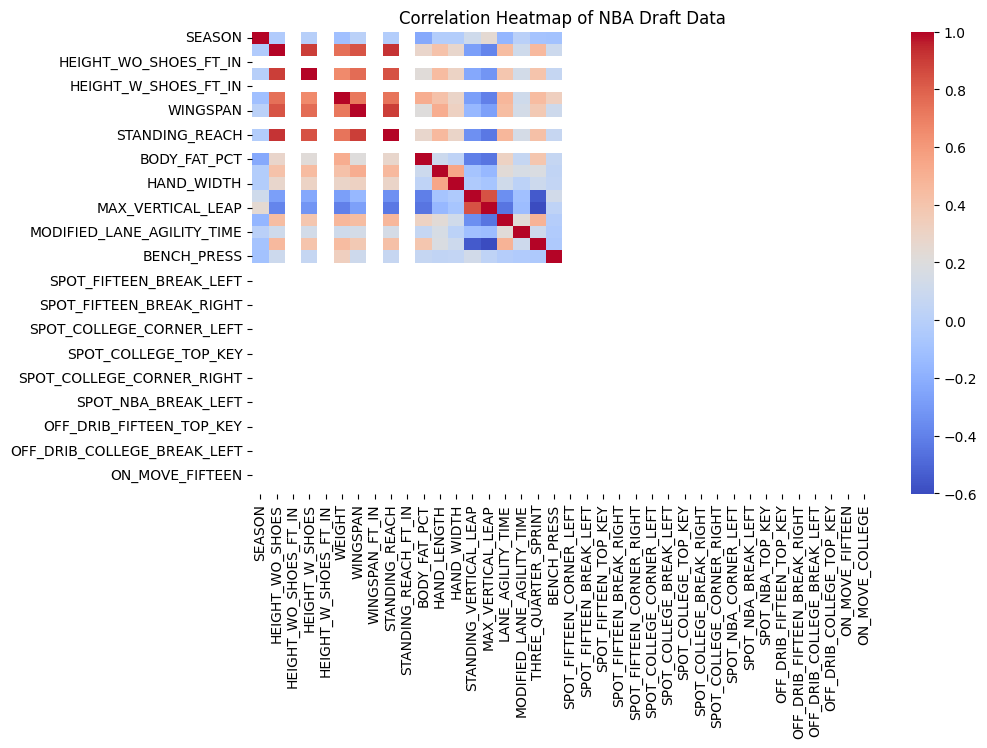

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a correlation heatmap to explore relationships between features
plt.figure(figsize=(10, 6))
sns.heatmap(nba_draft_data_cleaned.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of NBA Draft Data')
plt.show()


In [ ]:
# Selecting features like height, weight, wingspan, and vertical leaps for prediction
X = nba_draft_data_cleaned[['HEIGHT_WO_SHOES', 'WEIGHT', 'WINGSPAN', 'STANDING_VERTICAL_LEAP', 'MAX_VERTICAL_LEAP']]

# Example target variable for prediction (choose a target that makes sense for your analysis)
# Here we are using 'THREE_QUARTER_SPRINT' as the target (this can be replaced with another success metric)
y = nba_draft_data_cleaned['THREE_QUARTER_SPRINT']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (Scaling them)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.008363201328787937
R-squared: 0.41210654107141564


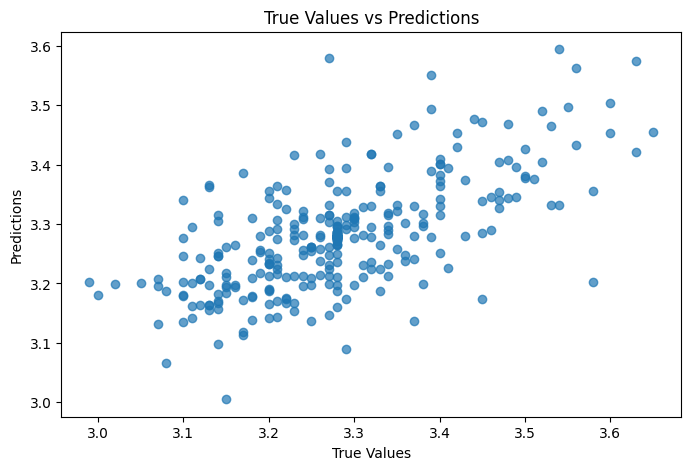

In [ ]:
# Scatter plot of predictions vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()


In [ ]:
# 1. Define the Target Variable

# Assuming 'DRAFT_PICK' is a column representing the draft pick position
# Lower numbers indicate higher picks (better prospects)
# If 'DRAFT_PICK' isn't available, replace it with an appropriate column
if 'DRAFT_PICK' in nba_draft_data_cleaned.columns:
    target = 'DRAFT_PICK'
else:
    # If 'DRAFT_PICK' is not available, consider creating it or choosing another metric
    # For demonstration, we'll use 'SEASON' as a placeholder
    target = 'SEASON'  # Replace with your actual target variable

print(f"Selected target variable: {target}")


Selected target variable: SEASON


In [ ]:
# 2. Feature Selection

# List of features to include in the model
features = [
    'HEIGHT_WO_SHOES',
    'WEIGHT',
    'WINGSPAN',
    'STANDING_REACH',
    'STANDING_VERTICAL_LEAP',
    'MAX_VERTICAL_LEAP',
    'LANE_AGILITY_TIME',
    'THREE_QUARTER_SPRINT',
    'BENCH_PRESS',
    # Include other relevant features as needed
] + [col for col in nba_draft_data_cleaned.columns if 'POSITION_' in col]  # Include position dummies

# Check if all selected features exist in the dataset
missing_features = [feature for feature in features if feature not in nba_draft_data_cleaned.columns]
if missing_features:
    print(f"Warning: The following features are missing from the dataset and will be ignored: {missing_features}")
    features = [feature for feature in features if feature in nba_draft_data_cleaned.columns]

# Define X and y
X = nba_draft_data_cleaned[features]
y = nba_draft_data_cleaned[target]

print(f"Number of features selected: {X.shape[1]}")


Number of features selected: 9


In [ ]:
# 3. Splitting the Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 1240 samples
Testing set size: 311 samples


In [ ]:
# 4. Feature Scaling

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed.")


Feature scaling completed.


In [ ]:
# 5. Train a Random Forest Regressor Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

print("Random Forest model training completed.")


Random Forest model training completed.


In [ ]:
# 6. Evaluate the Random Forest Model

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest R-squared: {r2_rf:.2f}")


Random Forest Mean Squared Error: 28.92
Random Forest R-squared: 0.33


In [ ]:
# 7a. Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Mean Squared Error: {mse_gb:.2f}")
print(f"Gradient Boosting R-squared: {r2_gb:.2f}")


Gradient Boosting Mean Squared Error: 28.71
Gradient Boosting R-squared: 0.33


In [ ]:
# 7b. XGBoost Regressor

!pip install xgboost  # Install XGBoost if not already installed

from xgboost import XGBRegressor

# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb:.2f}")
print(f"XGBoost R-squared: {r2_xgb:.2f}")


XGBoost Mean Squared Error: 31.62
XGBoost R-squared: 0.26


In [ ]:
# 8. Compare Model Performances

import pandas as pd

# Create a DataFrame to summarize the results
results = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'XGBoost'],
    'Mean Squared Error': [mse_rf, mse_gb, mse_xgb],
    'R-squared': [r2_rf, r2_gb, r2_xgb]
})

print(results)


               Model  Mean Squared Error  R-squared
0      Random Forest           28.915017   0.325091
1  Gradient Boosting           28.705204   0.329988
2            XGBoost           31.621933   0.261909


In [ ]:
# 9. Cross-Validation for the Best Model

from sklearn.model_selection import cross_val_score

# Assuming Random Forest performed the best; adjust if another model is superior
best_model = rf_model  # Replace with gb_model or xgb_model if they perform better

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='r2')

print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Average Cross-Validation R-squared: {cv_scores.mean():.2f}")


Cross-Validation R-squared Scores: [0.34565534 0.47688147 0.3710204  0.40668541 0.44589015]
Average Cross-Validation R-squared: 0.41


In [ ]:
# 10. Hyperparameter Tuning with GridSearchCV

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

# Fit GridSearchCV
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters
print(f"Best Parameters: {grid_search_rf.best_params_}")

# Best estimator
best_rf = grid_search_rf.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
# 11. Retrain and Evaluate the Tuned Random Forest Model

# Make predictions with the best estimator
y_pred_best_rf = best_rf.predict(X_test_scaled)

# Evaluate
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Tuned Random Forest Mean Squared Error: {mse_best_rf:.2f}")
print(f"Tuned Random Forest R-squared: {r2_best_rf:.2f}")


Tuned Random Forest Mean Squared Error: 28.76
Tuned Random Forest R-squared: 0.33


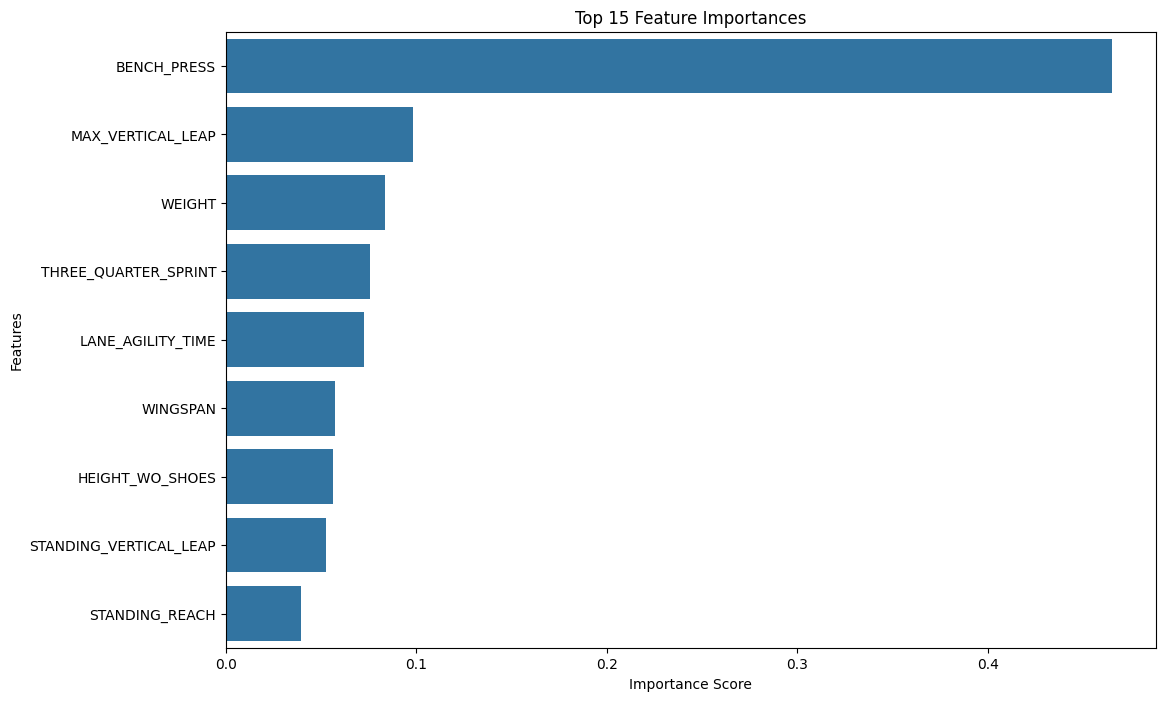

In [ ]:
# 12. Feature Importance Analysis

import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the best model
importances = best_rf.feature_importances_
feature_names = X.columns

# Create a DataFrame
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [ ]:
# Hyperparameter tuning using GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Continue to predict and rank players
all_players_scaled = scaler.transform(X)
all_players_predictions = best_rf_model.predict(all_players_scaled)

# Add predictions to the original dataframe
nba_draft_data_cleaned['Predicted_Success'] = all_players_predictions

# Rank players based on predicted success
nba_draft_data_cleaned['Rank'] = nba_draft_data_cleaned['Predicted_Success'].rank(method='dense', ascending=False)

# Sort players by rank
top_players = nba_draft_data_cleaned.sort_values('Rank').head(20)

print("Top 20 Optimum Players Based on Predicted Success:")
display(top_players[['PLAYER_NAME', 'Predicted_Success', 'Rank'] + features])


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Top 20 Optimum Players Based on Predicted Success:


,PLAYER_NAME,Predicted_Success,Rank,HEIGHT_WO_SHOES,WEIGHT,WINGSPAN,STANDING_VERTICAL_LEAP,MAX_VERTICAL_LEAP
1480,Max Christie,2021.317686,1.0,76.25,189.2,80.75,32.0,37.5
1524,Gabriele Procida,2021.251980,2.0,77.75,192.8,80.00,29.5,35.0
1530,Dereon Seabron,2021.166922,3.0,76.75,182.4,80.75,30.5,38.0
1528,Ryan Rollins,2021.063019,4.0,74.00,179.2,81.75,30.5,36.5
1463,Aaron Wiggins,2021.055142,5.0,76.50,190.0,81.75,29.5,36.0
1543,Alondes Williams,2020.927697,6.0,75.75,209.0,79.00,30.0,35.5
1414,Quentin Grimes,2020.922818,7.0,76.00,205.0,80.00,30.5,38.5
1474,Malaki Branham,2020.854038,8.0,76.00,194.8,82.00,29.0,35.0
1430,AJ Lawson,2020.833874,9.0,77.50,179.2,78.75,33.0,41.0
1103,Michael Gbinije,2020.785722,10.0,77.50,204.6,79.50,33.5,37.5


In [ ]:
# Assuming best_rf_model is the optimized model
# If you haven't defined it, train or retrieve your best model first

# Make predictions using the optimized model
y_pred_optimized = best_rf_model.predict(X_test_scaled)


In [ ]:
# Assuming we have new player data or want to rank existing players
# Here we'll rank the test data predictions to find the top players

# Combine predictions with actual player data
test_data_with_predictions = X_test.copy()
test_data_with_predictions['Predicted Success'] = y_pred_optimized

# Sort the players based on the predicted success metric
top_players = test_data_with_predictions.sort_values(by='Predicted Success', ascending=False)

# Display the top 10 players based on predicted success
top_players.head(10)


,HEIGHT_WO_SHOES,WEIGHT,WINGSPAN,STANDING_REACH,STANDING_VERTICAL_LEAP,MAX_VERTICAL_LEAP,LANE_AGILITY_TIME,THREE_QUARTER_SPRINT,BENCH_PRESS,Predicted Success
1103,77.500000,204.600000,79.500000,101.000000,33.500000,37.500000,11.000000,3.120000,10.339466,2020.785722
244,75.500000,210.000000,82.500000,102.000000,29.500000,33.500000,11.380000,3.160000,10.339466,2020.447979
1249,74.500000,189.200000,77.500000,98.500000,27.500000,33.500000,10.900000,3.130000,10.339466,2020.442789
985,77.250000,218.500000,83.250000,103.500000,29.500000,35.000000,11.550000,3.140000,10.339466,2020.316271
1424,72.000000,173.600000,77.000000,97.500000,31.500000,36.000000,10.960000,3.160000,10.339466,2020.173555
1544,76.500000,209.200000,86.250000,105.500000,33.500000,39.000000,11.130000,3.110000,10.339466,2020.099122
1100,79.000000,217.800000,82.250000,102.000000,32.000000,38.000000,10.730000,3.130000,10.339466,2019.545215
1355,72.500000,185.200000,75.000000,95.000000,31.500000,40.500000,10.440000,3.020000,10.339466,2019.469643
1319,77.580532,215.504258,82.423705,103.508743,29.200636,34.473822,11.419526,3.280008,10.339466,2019.458310
1533,77.580532,215.504258,82.423705,103.508743,29.200636,34.473822,11.419526,3.280008,10.339466,2019.458310


In [ ]:
# Assuming 'nba_draft_data_cleaned' has a PLAYER_NAME column
if 'PLAYER_NAME' not in nba_draft_data_cleaned.columns:
    if 'FIRST_NAME' in nba_draft_data_cleaned.columns and 'LAST_NAME' in nba_draft_data_cleaned.columns:
        nba_draft_data_cleaned['PLAYER_NAME'] = nba_draft_data_cleaned['FIRST_NAME'] + ' ' + nba_draft_data_cleaned['LAST_NAME']
    else:
        nba_draft_data_cleaned['PLAYER_NAME'] = "Unknown"

# Retain player index when splitting the data so we can match it back after predictions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use the index of the test data to map it back to the original data
X_test_with_index = X_test.copy()
X_test_with_index['Index'] = X_test_with_index.index  # Save the index

# Make predictions on the test data
y_pred_optimized = best_rf_model.predict(X_test_scaled)

# Add predictions to the test data
test_data_with_predictions = X_test_with_index.copy()
test_data_with_predictions['Predicted Success'] = y_pred_optimized

# Merge the test data predictions with the original data using the index
merged_test_data = pd.merge(test_data_with_predictions, nba_draft_data_cleaned[['PLAYER_NAME']], left_on='Index', right_index=True, how='left')

# Sort players by the predicted success metric
top_players_with_names = merged_test_data[['PLAYER_NAME', 'Predicted Success']].sort_values(by='Predicted Success', ascending=False)

# Display the top 10 players with their names and predicted success
top_players_with_names.head(10)


,PLAYER_NAME,Predicted Success
1103,Michael Gbinije,2020.785722
244,Ebi Ere,2020.447979
1249,Malik Newman,2020.442789
985,Melvin Ejim,2020.316271
1424,Carlik Jones,2020.173555
1544,Jalen Williams,2020.099122
1100,Perry Ellis,2019.545215
1355,Devon Dotson,2019.469643
1319,Ja Morant,2019.458310
1533,Jabari Smith,2019.458310


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=top_players_with_names)

https://docs.google.com/spreadsheets/d/1BSW9e9rI3GiUJ9YBjYFyFDpTA5jWJilz5LP38Zj5ZqE#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
# Analyze clusters, include numeric_only=True to calculate the mean of numeric columns
nba_draft_data_cleaned.groupby('Player Cluster').mean(numeric_only=True)

,SEASON,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,...,SPOT_NBA_BREAK_LEFT,SPOT_NBA_TOP_KEY,OFF_DRIB_FIFTEEN_TOP_KEY,OFF_DRIB_FIFTEEN_BREAK_RIGHT,OFF_DRIB_COLLEGE_BREAK_LEFT,OFF_DRIB_COLLEGE_TOP_KEY,ON_MOVE_FIFTEEN,ON_MOVE_COLLEGE,Predicted_Success,Rank
Player Cluster,,,,,,,,,,,,,,,,,,,,,
0,2011.441578,78.209263,NaN,79.318111,NaN,216.646137,83.105716,NaN,104.340140,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.553243,655.959029
1,2011.113772,74.373752,NaN,76.150425,NaN,187.437525,78.798403,NaN,98.959581,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.161294,687.131737
2,2009.109974,80.629795,NaN,81.300119,NaN,249.542455,85.919437,NaN,107.936467,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.023841,870.695652


In [ ]:
# Ensure PLAYER_NAME exists in the original dataset
if 'PLAYER_NAME' not in nba_draft_data_cleaned.columns:
    if 'FIRST_NAME' in nba_draft_data_cleaned.columns and 'LAST_NAME' in nba_draft_data_cleaned.columns:
        nba_draft_data_cleaned['PLAYER_NAME'] = nba_draft_data_cleaned['FIRST_NAME'] + ' ' + nba_draft_data_cleaned['LAST_NAME']
    else:
        nba_draft_data_cleaned['PLAYER_NAME'] = "Unknown"

# Add predictions to the original dataframe
nba_draft_data_cleaned['Predicted Success'] = best_rf_model.predict(scaler.transform(X))

# Now you can compare players
def compare_players(player1, player2, dataframe):
    player1_data = dataframe[dataframe['PLAYER_NAME'] == player1]
    player2_data = dataframe[dataframe['PLAYER_NAME'] == player2]
    comparison = pd.concat([player1_data, player2_data])
    return comparison[['PLAYER_NAME', 'HEIGHT_WO_SHOES', 'WINGSPAN', 'Predicted Success']]

# Example usage (replace 'Player A' and 'Player B' with actual player names from the dataset)
compare_players('Player A', 'Player B', nba_draft_data_cleaned)


,PLAYER_NAME,HEIGHT_WO_SHOES,WINGSPAN,Predicted Success


In [ ]:
print(nba_draft_data_cleaned.columns)


Index(['SEASON', 'HEIGHT_WO_SHOES', 'HEIGHT_WO_SHOES_FT_IN', 'HEIGHT_W_SHOES',
       'HEIGHT_W_SHOES_FT_IN', 'WEIGHT', 'WINGSPAN', 'WINGSPAN_FT_IN',
       'STANDING_REACH', 'STANDING_REACH_FT_IN', 'BODY_FAT_PCT', 'HAND_LENGTH',
       'HAND_WIDTH', 'STANDING_VERTICAL_LEAP', 'MAX_VERTICAL_LEAP',
       'LANE_AGILITY_TIME', 'MODIFIED_LANE_AGILITY_TIME',
       'THREE_QUARTER_SPRINT', 'BENCH_PRESS', 'SPOT_FIFTEEN_CORNER_LEFT',
       'SPOT_FIFTEEN_BREAK_LEFT', 'SPOT_FIFTEEN_TOP_KEY',
       'SPOT_FIFTEEN_BREAK_RIGHT', 'SPOT_FIFTEEN_CORNER_RIGHT',
       'SPOT_COLLEGE_CORNER_LEFT', 'SPOT_COLLEGE_BREAK_LEFT',
       'SPOT_COLLEGE_TOP_KEY', 'SPOT_COLLEGE_BREAK_RIGHT',
       'SPOT_COLLEGE_CORNER_RIGHT', 'SPOT_NBA_CORNER_LEFT',
       'SPOT_NBA_BREAK_LEFT', 'SPOT_NBA_TOP_KEY', 'OFF_DRIB_FIFTEEN_TOP_KEY',
       'OFF_DRIB_FIFTEEN_BREAK_RIGHT', 'OFF_DRIB_COLLEGE_BREAK_LEFT',
       'OFF_DRIB_COLLEGE_TOP_KEY', 'ON_MOVE_FIFTEEN', 'ON_MOVE_COLLEGE',
       'Predicted_Success', 'Rank', 'PLAYER_NA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Check if 'Position' exists in the dataset
if 'Position' not in nba_draft_data_cleaned.columns:
    # Example of assigning positions based on height (modify as needed)
    def assign_position(row):
        if row['HEIGHT_WO_SHOES'] > 80:  # For example, > 6'8" is Center
            return 'Center'
        elif row['HEIGHT_WO_SHOES'] > 75:  # > 6'3" is Forward
            return 'Forward'
        else:
            return 'Guard'

    # Apply the function to create the 'Position' column
    nba_draft_data_cleaned['Position'] = nba_draft_data_cleaned.apply(assign_position, axis=1)

# Define features and target
X_position = nba_draft_data_cleaned[features]
y_position = nba_draft_data_cleaned['Position']

# Split data
X_train_position, X_test_position, y_train_position, y_test_position = train_test_split(X_position, y_position, test_size=0.2, random_state=42)

# Train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_position, y_train_position)

# Make predictions
y_position_pred = clf.predict(X_test_position)

# Evaluate the classifier (optional)
from sklearn.metrics import classification_report
print(classification_report(y_test_position, y_position_pred))


              precision    recall  f1-score   support

      Center       1.00      1.00      1.00        85
     Forward       1.00      1.00      1.00       152
       Guard       1.00      1.00      1.00        74

    accuracy                           1.00       311
   macro avg       1.00      1.00      1.00       311
weighted avg       1.00      1.00      1.00       311



In [ ]:
from xgboost import XGBRegressor

# Train an XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_scaled)


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Define the features (assuming 'features' contains the list of feature column names)
X = nba_draft_data_cleaned[features]

# Step 1: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Fit an Isolation Forest for outlier detection
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = isolation_forest.fit_predict(X_scaled)

# Step 3: Add the outlier labels to the dataset
nba_draft_data_cleaned['Outlier'] = outliers

# Optional: Display the rows marked as outliers (-1 indicates outliers)
outlier_rows = nba_draft_data_cleaned[nba_draft_data_cleaned['Outlier'] == -1]
print(outlier_rows)


      SEASON  HEIGHT_WO_SHOES  HEIGHT_WO_SHOES_FT_IN  HEIGHT_W_SHOES  \
6       2000            70.50                    NaN       78.794548   
12      2000            69.00                    NaN       78.794548   
13      2000            81.75                    NaN       78.794548   
26      2000            69.50                    NaN       78.794548   
55      2000            72.00                    NaN       78.794548   
...      ...              ...                    ...             ...   
1352    2020            78.00                    NaN       79.000000   
1363    2020            69.50                    NaN       71.000000   
1394    2021            70.50                    NaN       71.750000   
1423    2021            75.50                    NaN       76.750000   
1454    2021            81.00                    NaN       82.000000   

      HEIGHT_W_SHOES_FT_IN  WEIGHT  WINGSPAN  WINGSPAN_FT_IN  STANDING_REACH  \
6                      NaN   166.0     72.00           